<a href="https://colab.research.google.com/github/sancoap/pytorch1/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch 
import torch.nn as nn #module that contains a lot of useful stuff in pytorch
import numpy as np
import matplotlib.pyplot as plt

In [26]:
#generate a data set of 20 random points
N = 20
X = np.random.random(N)*10 - 5
Y = 0.5 * X - 1 + np.random.randn(N)


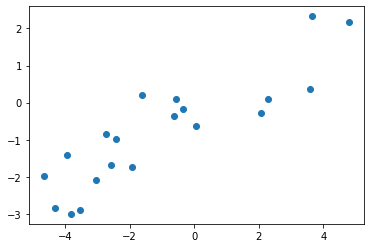

In [27]:
#generate plot
plt.scatter(X,Y)

In [28]:
#Now the Pytorch code starts
#linear model with 1 input and 1 output parameter, 1 X-Axis and 1 Y-Axis
model = nn.Linear(1,1)


In [29]:
#Define training process by defining the Loss and Optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

In [30]:
#Transform X and Y into data types that is relevant for PyTroch
#We have to shape our data (Num_of_samples * Num_of_dims)
X = X.reshape(N,1)
Y = Y.reshape(N,1)



In [31]:
#PyTorch requires you to create Torch Tensors from Numpy Arrays
#PyTorch uses float32 by default and numpy uses float64
#You have to cast down for converting Numpy Arrays into Torch Tensors
inputs = torch.from_numpy(X.astype(np.float32))
targets = torch.from_numpy(Y.astype(np.float32))


In [32]:
type(inputs)

torch.Tensor

In [33]:
#Train the model
#As gradient descent is an iterative process, we have to define a number of iterations or epocs
#Since the data is random, this might NOT work every time. I saw that losses were not converging in some cases!!!

n_epochs = 30
losses = []
for it in range(n_epochs):
  #zero the parameter gradients
  optimizer.zero_grad()

  #forward pass
  outputs = model(inputs)
  loss = criterion(outputs,targets)

  #keep the losses so we can plot it later
  #note that item() is python function, not numpy 
  #since loss is a single value, we don't use a numpy array to store it 
  losses.append(loss.item())

  #backward pass
  loss.backward()
  optimizer.step()

  print(f'Epoch {it+1}/{n_epochs}, Loss: {loss.item():.4f}')





Epoch 1/30, Loss: 0.6068
Epoch 2/30, Loss: 0.5628
Epoch 3/30, Loss: 0.5340
Epoch 4/30, Loss: 0.5150
Epoch 5/30, Loss: 0.5025
Epoch 6/30, Loss: 0.4943
Epoch 7/30, Loss: 0.4889
Epoch 8/30, Loss: 0.4854
Epoch 9/30, Loss: 0.4830
Epoch 10/30, Loss: 0.4815
Epoch 11/30, Loss: 0.4804
Epoch 12/30, Loss: 0.4798
Epoch 13/30, Loss: 0.4793
Epoch 14/30, Loss: 0.4790
Epoch 15/30, Loss: 0.4788
Epoch 16/30, Loss: 0.4787
Epoch 17/30, Loss: 0.4786
Epoch 18/30, Loss: 0.4786
Epoch 19/30, Loss: 0.4785
Epoch 20/30, Loss: 0.4785
Epoch 21/30, Loss: 0.4785
Epoch 22/30, Loss: 0.4785
Epoch 23/30, Loss: 0.4785
Epoch 24/30, Loss: 0.4785
Epoch 25/30, Loss: 0.4785
Epoch 26/30, Loss: 0.4785
Epoch 27/30, Loss: 0.4785
Epoch 28/30, Loss: 0.4785
Epoch 29/30, Loss: 0.4785
Epoch 30/30, Loss: 0.4785


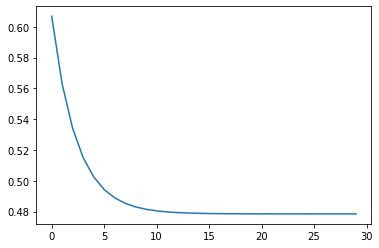

In [34]:
plt.plot(losses)

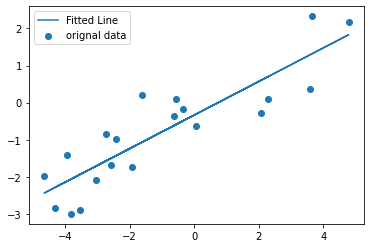

In [35]:
#use the trained model to make predictions and plot the result
#here were detach the torch tensor as we want to use a numpy array to plot the data

predicted = model(inputs).detach().numpy()
plt.scatter(X,Y, label= "orignal data")
plt.plot(X,predicted, label = 'Fitted Line')
plt.legend()
plt.show()

In [36]:
#This is an important step for synthetic data
w = model.weight.data.numpy()
b = model.bias.data.numpy()
print(w,b)

[[0.45273742]] [-0.33605134]
